<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch01/blob/main/06_FilmZusammensetzen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aus einzelnen Bildern einen Film zusammensetzen

Hier erzeugen wir zunächst zwei NumPy Arrays, die jeweils ein komplett weißes und ein komplett schwarzes Bild (400x300 Pixel) repräsentieren.

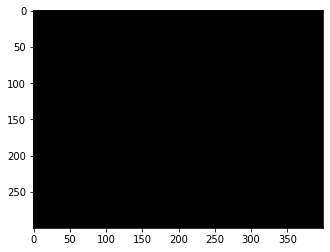

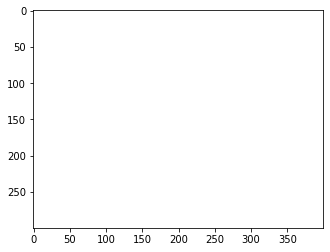

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

width, height = 400, 300

black_image = np.zeros((height, width, 3), "uint8")
white_image = black_image + 255

plt.imshow(black_image)
plt.show()
plt.imshow(white_image)
plt.show()

Das Zusammenbauen des Films erledigt der `cv2.VideoWriter`.

Nach dem Ausführen der folgenden Code-Zelle findet ihr eine mp4-Datei im Dateien-Bereich, der eine Sekunde dauert und (Achtung) zehnmal flackert.

In [ ]:
from cv2 import VideoWriter
import cv2

# Abmessungen und Bildrate:
width, height = 400, 300
frame_rate = 10

# Der Codec. Mit diesem hier haben wir gute Erfahrungen gemacht:
codec = cv2.VideoWriter_fourcc(*'mp4v')

# So initialisieren wir den VideoWriter.
# Das erste Argument bestimmt den Pfad zur Ausgabedatei.
# Achtung: Die Abmessungen werden hier in der üblichen Reihenfolge geschrieben,
# also (Breite, Höhe) - also nicht so, wie wir es von NumPy Arrays gewohnt sind.
out = VideoWriter('movie.mp4', codec, frame_rate, (width, height))

# Mit out.write() schreiben wir jeweils ein passendes NumPy Array in den Ausgabestrom:
out.write(black_image)
out.write(white_image)
out.write(black_image)
out.write(white_image)
out.write(black_image)
out.write(white_image)
out.write(black_image)
out.write(white_image)
out.write(black_image)
out.write(white_image)
out.write(black_image)
out.write(white_image)

out.release()
cv2.destroyAllWindows()

## Einen Film aus NumPy Arrays vom Typ float32 bauen.

Im vorherigen Beispiel waren die Arrays bereits vom Typ `uint8` und mit einem Wertebereich von 0-255.

Die Ausgaben von Modellen sind aber, wenn Sie Bilder repräsentieren, in der Regeln vom Typ `float32` und spielen im Wertebereich von 0.0 - 1.0.

`plt.imshow()` versteht den Unterschied:

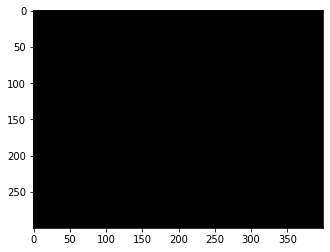

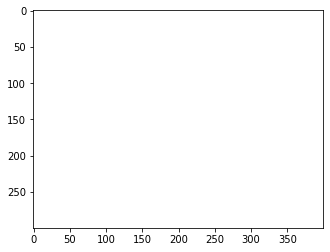

In [ ]:
width, height = 400, 300

black_image = np.zeros((height, width, 3), "float32")
white_image = black_image + 1.0

plt.imshow(black_image)
plt.show()
plt.imshow(white_image)
plt.show()

Der `VideoWriter` akzeptiert das `float32` Array allerdings nicht:

In [ ]:
width, height = 400, 300
frame_rate = 10

codec = cv2.VideoWriter_fourcc(*'mp4v')

out = VideoWriter('movie_from_float32.mp4', codec, frame_rate, (width, height))

# Diese Zeile schmeißt einen Fehler:
# out.write(black_image)
# ... error: (-215:Assertion failed) image.depth() == CV_8U in function 'write'

# So funktionierts:
black_image = (black_image * 255.0).astype("uint8")
white_image = (white_image * 255.0).astype("uint8")
# P.S.: Das ist das Gegenstück zur Umwandlung von uint8 in float32,
# wie wir es im Rezept "Bilddateien in NumPy Arrays umwandeln" gezeigt haben.
# P.P.S.: Wenn wir NumPy Arrays mit PIL als Bilddateien automatisch spreichern,
# müssen wir diese Umwandlung nicht machen, das erledigt PIL im Hintergrund.

for _ in range(5):
  out.write(black_image)
  out.write(white_image)

out.release()
cv2.destroyAllWindows()